In [24]:
import pandas as pd 
import numpy as np 

In [70]:
df = pd.read_csv('online.retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,"2,75",17850.0,United Kingdom


In [71]:
# здесь мы наблюдаем разное кол-во значений в столбце Quantity и CustomerID, 
# скорее всего есть пропуски, отрицательное значение min в Quantity, вероятнее всего это возвращенные товары 
df.describe()  

,Quantity,CustomerID
count,54214.000000,40643.000000
mean,9.610802,15283.422803
std,57.358422,1707.982278
min,-9600.000000,12347.000000
25%,1.000000,13969.000000
50%,3.000000,15152.000000
75%,10.000000,16775.000000
max,2400.000000,18287.000000


In [72]:
df[df.CustomerID.notnull()].sort_values('UnitPrice').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
48656,577696,M,Manual,1,11/21/11 11:57,0,16406.0,United Kingdom
3325,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/10 14:36,0,16560.0,United Kingdom
43615,574175,22065,CHRISTMAS PUDDING TRINKET POT,12,11/3/11 11:47,0,14110.0,United Kingdom
48101,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,11/18/11 13:23,0,12444.0,Norway
36254,568375,BANK CHARGES,Bank Charges,1,9/26/11 17:01,"0,001",13405.0,United Kingdom


In [73]:
# оставляем данные только с заполненным CustomerID и UnitPrice не равен 0
df1 = df[(df.CustomerID.notnull()) & (df.UnitPrice!=0)]
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,"2,75",17850.0,United Kingdom


In [74]:
# проверяем датафрейм на наличие дубликатов (в нашем фрейме их 50) и избавляемся от них
df1.duplicated().sum()

50

In [75]:
df1.drop_duplicates(inplace=True)
df1.shape

<ipython-input-75-a3540b1ae742>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


(40593, 8)

In [81]:
# здесь мы видим, что нужно поработать с типами данных. А именно: 
# столбец InvoiceDate нужно привести к формату datetime
# в столбце CustomerID изменить тип данных на int64
# в столбце UnitPrice изменить тип данных на float

df1.CustomerID = df1.CustomerID.astype('int64')
df1['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],infer_datetime_format=True)
df1['UnitPrice'] = df['UnitPrice'].str.replace(',', '.').astype('float')

C:\Users\romab\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-81-48527b12911a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],infer_datetime_format=True)
<ipython-input-81-48527b12911a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [78]:
# выведем кол-во уникальных пользователей в каждой стране. Видим, что наиболее активные покупатели в Великобританиии
countries=df1.groupby(by='Country').CustomerID.nunique().sort_values(ascending=False)
countries.head()

Country
United Kingdom    3441
Germany             87
France              79
Spain               26
Belgium             24
Name: CustomerID, dtype: int64

In [15]:
# выведем кол-во транзакций для каждой страны. Лучше всего продажи идут, опять же, в Великобританиии
df1['Country'].value_counts().head()

United Kingdom    36170
Germany             951
France              874
EIRE                720
Spain               253
Name: Country, dtype: int64

In [79]:
# создадим новый столбец Revenue для того, чтобы понимать общую сумму выручки по всем магазинам
df1['Revenue']=df1['Quantity']*df1['UnitPrice']
df1.head()

<ipython-input-79-0da857d5bb83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Revenue']=df1['Quantity']*df1['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047,United Kingdom,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047,United Kingdom,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850,United Kingdom,22.00


In [80]:
# добавим еще один столбец с месяцем для подсчета необходимых метрик 
df1['InvoiceMonth'] = df1['InvoiceDate'].dt.strftime('%Y-%m') 
df1.head()

<ipython-input-80-ccf29d6b4161>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceMonth'] = df1['InvoiceDate'].dt.strftime('%Y-%m')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010-12
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047,United Kingdom,17.85,2010-12
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047,United Kingdom,14.85,2010-12
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850,United Kingdom,22.00,2010-12


In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40593 entries, 0 to 54213
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     40593 non-null  object        
 1   StockCode     40593 non-null  object        
 2   Description   40593 non-null  object        
 3   Quantity      40593 non-null  int64         
 4   InvoiceDate   40593 non-null  datetime64[ns]
 5   UnitPrice     40593 non-null  float64       
 6   CustomerID    40593 non-null  int64         
 7   Country       40593 non-null  object        
 8   Revenue       40593 non-null  float64       
 9   InvoiceMonth  40593 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 3.4+ MB


<AxesSubplot:xlabel='InvoiceMonth'>

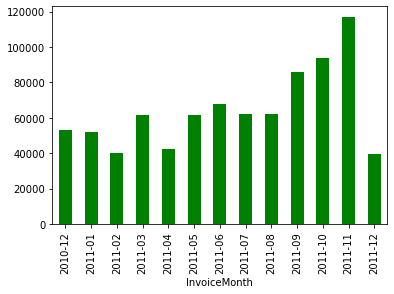

In [87]:
# для более тщательного анализа можем посчитать суммарную выручку по каждому месяцу 

import matplotlib as plt 
df1.groupby(['InvoiceMonth'])['Revenue'].sum().plot(kind='bar', color = 'g')

Из графика выше можем сделать предварительный  вывод, что наибольшее кол-во покупок было совершено в осенние месяцы, 
а именно в ноябре. И скорее всего это связано с покупкой подарков/одежды перед Новым Годом. 

<AxesSubplot:xlabel='InvoiceMonth'>

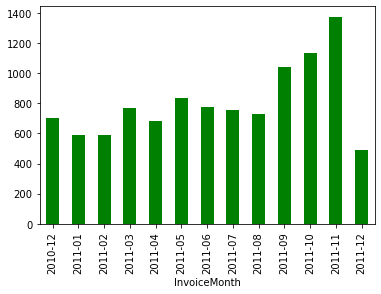

In [90]:
# посмотрим на кол-во уникальных покупателей в разрезе по месяцам 

df1.groupby(['InvoiceMonth'])['CustomerID'].nunique().plot(kind='bar', color = 'g')

Здесь мы можем наблюдать ту же самую тенденцию, как и на предыдущем графике. В ноябре пришло больше всего пользователей в наш магазин, 
все стали массово закупаться перед праздниками, а меж тем верояино, что в магазине появилось больше предновогодних скидок 

In [92]:
df1.to_csv('online.shop', index=False)